# Getting started with Jupyter Notebooks for Data Science

- Code cells for Python
- Markdown cells for explanations 

In [1]:
# usual imports with shorthand abbreviations
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## NumPy basics

- Library for numeric operations on arrays
- Arrays can have a single dimension (vectors), two dimensions (matrix), or more than two dimensions (tensor)
- Pandas dataframes make use of NumPy to store the data

In [2]:
# 1-D array is a vector
vector = np.array([1, 2, 3, 4, 5, 0])

vector

array([1, 2, 3, 4, 5, 0])

In [3]:
# shape property tells you the dimensionality
vector.shape

(6,)

In [4]:
# adding a singular value adds it to all values in the array
vector + 5

array([ 6,  7,  8,  9, 10,  5])

In [5]:
# likewise with multiplication
vector * 2

array([ 2,  4,  6,  8, 10,  0])

In [6]:
# 2-D array is called a matrix
matrix = np.array([
    [1, 2, 3],
    [4, 5, 6]
])

matrix, matrix.shape

(array([[1, 2, 3],
        [4, 5, 6]]),
 (2, 3))

In [7]:
# shapes are always tuples
matrix.shape

(2, 3)

In [8]:
# matrices close over addition
matrix + 5

array([[ 6,  7,  8],
       [ 9, 10, 11]])

In [9]:
# the T property of a matrix stands for "Transpose"
# it means that the matrix is simply rotated
matrix.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [10]:
# the flatten function creates a 1-D vector out of any array
matrix.flatten()

array([1, 2, 3, 4, 5, 6])

$$
    1 \times x \times 1 = 6
$$

In [19]:
matrix.reshape(1, -1, 2).shape

(1, 3, 2)

In [11]:
# with the reshape function you can reshape data
# note the -1 indicates a 'wildcard', meaning that 
# the dimensionality is infered from the other values  
matrix.reshape(1, -1, 1).shape

(1, 6, 1)

In [12]:
# this is almost the same as flatten()
matrix.reshape(1, -1)

array([[1, 2, 3, 4, 5, 6]])

In [13]:
# 3-D tensor object carries a hierarchy of data
tensor = np.array([
    [
        [1, 2],
        [3, 4]
    ],
    [
        [5, 6],
        [7, 8]
    ],
    [
        [9, 10],
        [11, 12]
    ],
])
tensor, tensor.shape

(array([[[ 1,  2],
         [ 3,  4]],
 
        [[ 5,  6],
         [ 7,  8]],
 
        [[ 9, 10],
         [11, 12]]]),
 (3, 2, 2))

In [14]:
# reshape from (3, 2, 2) to (3, 2*2)
# flattens last dimension only
tensor.reshape(3, 2*2)

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [15]:
# take the mean over specific dimension (axis)
np.mean(tensor, axis=-1)

array([[ 1.5,  3.5],
       [ 5.5,  7.5],
       [ 9.5, 11.5]])

## Matplotlib basics

- plot data in various ways
- works well with NumPy and Pandas
- for advanced plots use the Seaborn packaga

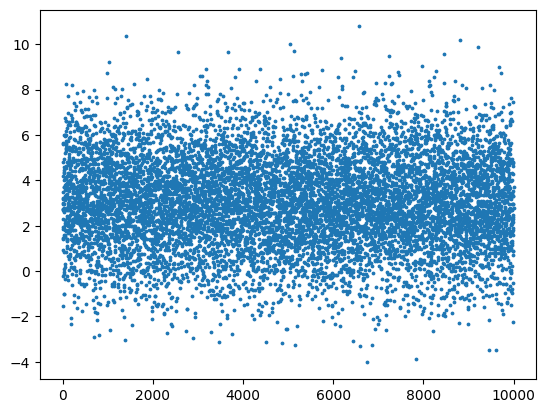

In [16]:
data = np.random.normal(loc=3, scale=2, size=(10000))

plt.scatter(range(10000), data, s=3)

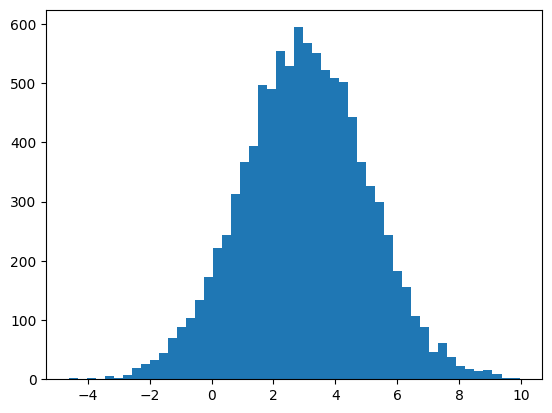

In [17]:
plt.hist(data, bins=50)
plt.show()

## Pandas basics

- Dataframe object is a simple matrix (2-D)
- Provides many useful operations (e.g., filtering, sorting, statistics, etc.)

In [18]:
df = pd.read_csv("../datasets/data_dc1.csv", sep=';')

df

,id,lengte,schoenmaat
0,1,170,37
1,2,182,43
2,3,180,46
3,4,194,45
4,5,170,40
5,6,182,42
6,7,183,42
7,8,182,43
8,9,184,44
9,10,180,43


In [19]:
# index into dataframe by column
df['lengte'], df['lengte'].shape

(0     170
 1     182
 2     180
 3     194
 4     170
 5     182
 6     183
 7     182
 8     184
 9     180
 10    180
 11    179
 12    184
 13    186
 14    191
 15    180
 Name: lengte, dtype: int64,
 (16,))

In [20]:
# index based on rows (row 5 to 10 exclusive)
df.iloc[5:10]

,id,lengte,schoenmaat
5,6,182,42
6,7,183,42
7,8,182,43
8,9,184,44
9,10,180,43


In [21]:
# summary statistics of dataframe
df.describe()

,id,lengte,schoenmaat
count,16.000000,16.000000,16.000000
mean,8.500000,181.687500,42.625000
std,4.760952,6.117938,2.156386
min,1.000000,170.000000,37.000000
25%,4.750000,180.000000,42.000000
50%,8.500000,182.000000,43.000000
75%,12.250000,184.000000,44.000000
max,16.000000,194.000000,46.000000


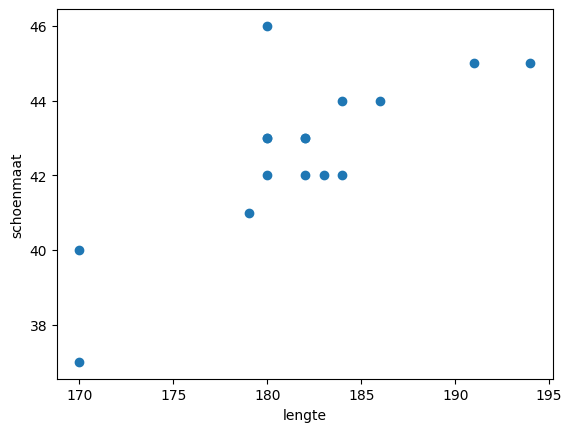

In [22]:
# plot one column against another column
plt.scatter(df['lengte'], df['schoenmaat'])
plt.xlabel('lengte')
plt.ylabel('schoenmaat')
plt.show()

In [23]:
# compute correlation between each column/feature 
df.corr(method='pearson')

,id,lengte,schoenmaat
id,1.000000,0.330733,0.220784
lengte,0.330733,1.000000,0.773790
schoenmaat,0.220784,0.773790,1.000000


## Anscombe's quartet dataset

https://en.wikipedia.org/wiki/Anscombe%27s_quartet

In [52]:
df = pd.read_csv("../datasets/anscombes.csv")
dataset_ids = list(df.dataset.unique())

df.head()

,id,dataset,x,y
0,0,I,10.0,8.04
1,1,I,8.0,6.95
2,2,I,13.0,7.58
3,3,I,9.0,8.81
4,4,I,11.0,8.33


In [53]:
dataset_ids

['I', 'II', 'III', 'IV']

In [59]:
df[(df['dataset'] == 'II') & (df['dataset'] == 'III')]

,id,dataset,x,y


In [47]:
# pandas filtering operation
df[(df['dataset'] == 'I') | (df['dataset'] == 'II')]

,id,dataset,x,y
0,0,I,10.0,8.04
1,1,I,8.0,6.95
2,2,I,13.0,7.58
3,3,I,9.0,8.81
4,4,I,11.0,8.33
5,5,I,14.0,9.96
6,6,I,6.0,7.24
7,7,I,4.0,4.26
8,8,I,12.0,10.84
9,9,I,7.0,4.82


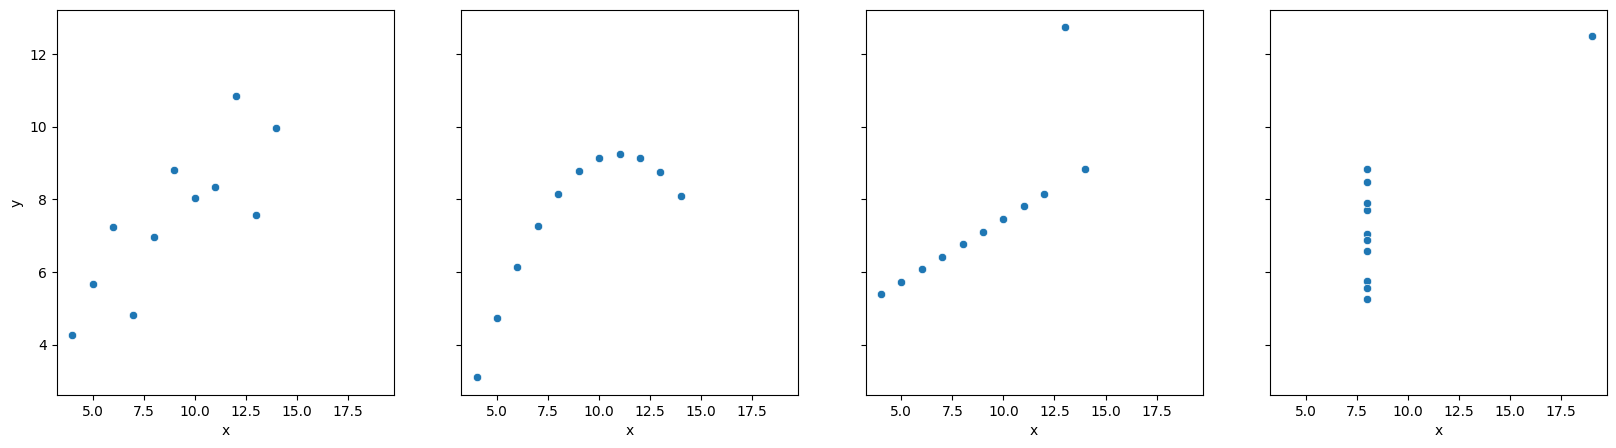

{'I': np.float64(0.81642051634484),
 'II': np.float64(0.8162365060002428),
 'III': np.float64(0.8162867394895984),
 'IV': np.float64(0.8165214368885028)}

In [51]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharex=True, sharey=True)

corrs = {}
for ax, id in zip(axes, dataset_ids):
    dataset = df[df['dataset'] == id]
    sns.scatterplot(ax=ax, x=dataset["x"], y=dataset["y"])
    corrs[id] = np.corrcoef(dataset["x"], dataset["y"])[0, 1]

plt.show()
corrs